In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
column_names=['POPULATION','PROFIT']
df= pd.read_csv('ex1data1.txt', sep=",", names=column_names)
df.shape
print(df)

    POPULATION    PROFIT
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


In [35]:
y = np.array(df['PROFIT'])
y = np.reshape(y,(y.shape[0],1))
# print(y)
y.shape

(97, 1)

In [36]:
del df['PROFIT']
df = (df-df.mean())/(df.max()-df.min())
x = np.array(df)
print(x)
x.shape

[[-0.11933442]
 [-0.153242  ]
 [ 0.02088949]
 [-0.06733775]
 [-0.133907  ]
 [ 0.01298898]
 [-0.03978784]
 [ 0.02435361]
 [-0.09743772]
 [-0.18078609]
 [-0.14258767]
 [ 0.34956713]
 [-0.14123113]
 [ 0.0144736 ]
 [-0.1466631 ]
 [-0.1618761 ]
 [-0.10447075]
 [-0.17639045]
 [-0.100733  ]
 [-0.06340205]
 [-0.11473501]
 [ 0.7050611 ]
 [-0.15543109]
 [-0.10675881]
 [-0.1510762 ]
 [ 0.62791903]
 [ 0.27178463]
 [ 0.1628542 ]
 [ 0.29204534]
 [ 0.8176012 ]
 [-0.16927009]
 [-0.09142937]
 [ 0.06336712]
 [-0.13204394]
 [ 0.00298671]
 [-0.01318111]
 [-0.00372029]
 [-0.14866588]
 [ 0.27225039]
 [-0.10516939]
 [-0.16027503]
 [-0.07436496]
 [ 0.20657774]
 [-0.13891978]
 [-0.01950967]
 [-0.06210374]
 [-0.17987785]
 [-0.13730707]
 [ 0.20611198]
 [-0.15243274]
 [-0.03607338]
 [-0.1660505 ]
 [-0.04284442]
 [-0.03241132]
 [-0.10636873]
 [-0.10484918]
 [-0.10978045]
 [-0.14672132]
 [ 0.06697679]
 [ 0.0753256 ]
 [ 0.03875152]
 [-0.173526  ]
 [ 0.76380552]
 [ 0.39288313]
 [ 0.62873411]
 [-0.05482036]
 [ 0.00787

(97, 1)

In [37]:
def predict(x, weights):
  predictions = np.dot(x, weights)
  return predictions

In [38]:

bias = np.ones(shape=(len(x),1))
xs = np.append(bias, x, axis=1)
print(xs)
xs.shape

[[ 1.         -0.11933442]
 [ 1.         -0.153242  ]
 [ 1.          0.02088949]
 [ 1.         -0.06733775]
 [ 1.         -0.133907  ]
 [ 1.          0.01298898]
 [ 1.         -0.03978784]
 [ 1.          0.02435361]
 [ 1.         -0.09743772]
 [ 1.         -0.18078609]
 [ 1.         -0.14258767]
 [ 1.          0.34956713]
 [ 1.         -0.14123113]
 [ 1.          0.0144736 ]
 [ 1.         -0.1466631 ]
 [ 1.         -0.1618761 ]
 [ 1.         -0.10447075]
 [ 1.         -0.17639045]
 [ 1.         -0.100733  ]
 [ 1.         -0.06340205]
 [ 1.         -0.11473501]
 [ 1.          0.7050611 ]
 [ 1.         -0.15543109]
 [ 1.         -0.10675881]
 [ 1.         -0.1510762 ]
 [ 1.          0.62791903]
 [ 1.          0.27178463]
 [ 1.          0.1628542 ]
 [ 1.          0.29204534]
 [ 1.          0.8176012 ]
 [ 1.         -0.16927009]
 [ 1.         -0.09142937]
 [ 1.          0.06336712]
 [ 1.         -0.13204394]
 [ 1.          0.00298671]
 [ 1.         -0.01318111]
 [ 1.         -0.00372029]
 

(97, 2)

In [39]:
W0 = 0.5
W1 = 0.5
weights = np.array([
    [W0],               
    [W1]])

In [40]:
def cost_function(x, y, weights):
    N = len(x)

    predictions = predict(x, weights)

    sqerror = (predictions - y)**2

    return 1.0/(2*N) * sqerror.sum()

In [41]:
def update_weights(x, y, weights, lr):
    
    N = len(x)

    predictions = predict(x, weights)

    error = y - predictions

    gradient = np.dot(-x.T,  error)

    gradient /= N

    gradient *= lr

    weights -= gradient

    return weights 

In [42]:
lr = 0.01
iters = 100000
costhistory = []
itera = []

In [43]:
def train(x, y, weights, lr, iters):
    
    for i in range(iters):
        weights = update_weights(x, y, weights, lr)
        cost = cost_function(x, y, weights)
        costhistory.append(cost)
        itera.append(i)
        if i % 10 == 0:
            print("iter={:d}   cost={:.2}".format(i, cost))

In [49]:
train(xs, y, weights, lr, iters)
ypredicted=predict(xs,weights)

iter=0   cost=4.5
iter=10   cost=4.5
iter=20   cost=4.5
iter=30   cost=4.5
iter=40   cost=4.5
iter=50   cost=4.5
iter=60   cost=4.5
iter=70   cost=4.5
iter=80   cost=4.5
iter=90   cost=4.5
iter=100   cost=4.5
iter=110   cost=4.5
iter=120   cost=4.5
iter=130   cost=4.5
iter=140   cost=4.5
iter=150   cost=4.5
iter=160   cost=4.5
iter=170   cost=4.5
iter=180   cost=4.5
iter=190   cost=4.5
iter=200   cost=4.5
iter=210   cost=4.5
iter=220   cost=4.5
iter=230   cost=4.5
iter=240   cost=4.5
iter=250   cost=4.5
iter=260   cost=4.5
iter=270   cost=4.5
iter=280   cost=4.5
iter=290   cost=4.5
iter=300   cost=4.5
iter=310   cost=4.5
iter=320   cost=4.5
iter=330   cost=4.5
iter=340   cost=4.5
iter=350   cost=4.5
iter=360   cost=4.5
iter=370   cost=4.5
iter=380   cost=4.5
iter=390   cost=4.5
iter=400   cost=4.5
iter=410   cost=4.5
iter=420   cost=4.5
iter=430   cost=4.5
iter=440   cost=4.5
iter=450   cost=4.5
iter=460   cost=4.5
iter=470   cost=4.5
iter=480   cost=4.5
iter=490   cost=4.5
iter=500   

iter=5350   cost=4.5
iter=5360   cost=4.5
iter=5370   cost=4.5
iter=5380   cost=4.5
iter=5390   cost=4.5
iter=5400   cost=4.5
iter=5410   cost=4.5
iter=5420   cost=4.5
iter=5430   cost=4.5
iter=5440   cost=4.5
iter=5450   cost=4.5
iter=5460   cost=4.5
iter=5470   cost=4.5
iter=5480   cost=4.5
iter=5490   cost=4.5
iter=5500   cost=4.5
iter=5510   cost=4.5
iter=5520   cost=4.5
iter=5530   cost=4.5
iter=5540   cost=4.5
iter=5550   cost=4.5
iter=5560   cost=4.5
iter=5570   cost=4.5
iter=5580   cost=4.5
iter=5590   cost=4.5
iter=5600   cost=4.5
iter=5610   cost=4.5
iter=5620   cost=4.5
iter=5630   cost=4.5
iter=5640   cost=4.5
iter=5650   cost=4.5
iter=5660   cost=4.5
iter=5670   cost=4.5
iter=5680   cost=4.5
iter=5690   cost=4.5
iter=5700   cost=4.5
iter=5710   cost=4.5
iter=5720   cost=4.5
iter=5730   cost=4.5
iter=5740   cost=4.5
iter=5750   cost=4.5
iter=5760   cost=4.5
iter=5770   cost=4.5
iter=5780   cost=4.5
iter=5790   cost=4.5
iter=5800   cost=4.5
iter=5810   cost=4.5
iter=5820   c

iter=11760   cost=4.5
iter=11770   cost=4.5
iter=11780   cost=4.5
iter=11790   cost=4.5
iter=11800   cost=4.5
iter=11810   cost=4.5
iter=11820   cost=4.5
iter=11830   cost=4.5
iter=11840   cost=4.5
iter=11850   cost=4.5
iter=11860   cost=4.5
iter=11870   cost=4.5
iter=11880   cost=4.5
iter=11890   cost=4.5
iter=11900   cost=4.5
iter=11910   cost=4.5
iter=11920   cost=4.5
iter=11930   cost=4.5
iter=11940   cost=4.5
iter=11950   cost=4.5
iter=11960   cost=4.5
iter=11970   cost=4.5
iter=11980   cost=4.5
iter=11990   cost=4.5
iter=12000   cost=4.5
iter=12010   cost=4.5
iter=12020   cost=4.5
iter=12030   cost=4.5
iter=12040   cost=4.5
iter=12050   cost=4.5
iter=12060   cost=4.5
iter=12070   cost=4.5
iter=12080   cost=4.5
iter=12090   cost=4.5
iter=12100   cost=4.5
iter=12110   cost=4.5
iter=12120   cost=4.5
iter=12130   cost=4.5
iter=12140   cost=4.5
iter=12150   cost=4.5
iter=12160   cost=4.5
iter=12170   cost=4.5
iter=12180   cost=4.5
iter=12190   cost=4.5
iter=12200   cost=4.5
iter=12210

iter=17770   cost=4.5
iter=17780   cost=4.5
iter=17790   cost=4.5
iter=17800   cost=4.5
iter=17810   cost=4.5
iter=17820   cost=4.5
iter=17830   cost=4.5
iter=17840   cost=4.5
iter=17850   cost=4.5
iter=17860   cost=4.5
iter=17870   cost=4.5
iter=17880   cost=4.5
iter=17890   cost=4.5
iter=17900   cost=4.5
iter=17910   cost=4.5
iter=17920   cost=4.5
iter=17930   cost=4.5
iter=17940   cost=4.5
iter=17950   cost=4.5
iter=17960   cost=4.5
iter=17970   cost=4.5
iter=17980   cost=4.5
iter=17990   cost=4.5
iter=18000   cost=4.5
iter=18010   cost=4.5
iter=18020   cost=4.5
iter=18030   cost=4.5
iter=18040   cost=4.5
iter=18050   cost=4.5
iter=18060   cost=4.5
iter=18070   cost=4.5
iter=18080   cost=4.5
iter=18090   cost=4.5
iter=18100   cost=4.5
iter=18110   cost=4.5
iter=18120   cost=4.5
iter=18130   cost=4.5
iter=18140   cost=4.5
iter=18150   cost=4.5
iter=18160   cost=4.5
iter=18170   cost=4.5
iter=18180   cost=4.5
iter=18190   cost=4.5
iter=18200   cost=4.5
iter=18210   cost=4.5
iter=18220

iter=23740   cost=4.5
iter=23750   cost=4.5
iter=23760   cost=4.5
iter=23770   cost=4.5
iter=23780   cost=4.5
iter=23790   cost=4.5
iter=23800   cost=4.5
iter=23810   cost=4.5
iter=23820   cost=4.5
iter=23830   cost=4.5
iter=23840   cost=4.5
iter=23850   cost=4.5
iter=23860   cost=4.5
iter=23870   cost=4.5
iter=23880   cost=4.5
iter=23890   cost=4.5
iter=23900   cost=4.5
iter=23910   cost=4.5
iter=23920   cost=4.5
iter=23930   cost=4.5
iter=23940   cost=4.5
iter=23950   cost=4.5
iter=23960   cost=4.5
iter=23970   cost=4.5
iter=23980   cost=4.5
iter=23990   cost=4.5
iter=24000   cost=4.5
iter=24010   cost=4.5
iter=24020   cost=4.5
iter=24030   cost=4.5
iter=24040   cost=4.5
iter=24050   cost=4.5
iter=24060   cost=4.5
iter=24070   cost=4.5
iter=24080   cost=4.5
iter=24090   cost=4.5
iter=24100   cost=4.5
iter=24110   cost=4.5
iter=24120   cost=4.5
iter=24130   cost=4.5
iter=24140   cost=4.5
iter=24150   cost=4.5
iter=24160   cost=4.5
iter=24170   cost=4.5
iter=24180   cost=4.5
iter=24190

iter=28660   cost=4.5
iter=28670   cost=4.5
iter=28680   cost=4.5
iter=28690   cost=4.5
iter=28700   cost=4.5
iter=28710   cost=4.5
iter=28720   cost=4.5
iter=28730   cost=4.5
iter=28740   cost=4.5
iter=28750   cost=4.5
iter=28760   cost=4.5
iter=28770   cost=4.5
iter=28780   cost=4.5
iter=28790   cost=4.5
iter=28800   cost=4.5
iter=28810   cost=4.5
iter=28820   cost=4.5
iter=28830   cost=4.5
iter=28840   cost=4.5
iter=28850   cost=4.5
iter=28860   cost=4.5
iter=28870   cost=4.5
iter=28880   cost=4.5
iter=28890   cost=4.5
iter=28900   cost=4.5
iter=28910   cost=4.5
iter=28920   cost=4.5
iter=28930   cost=4.5
iter=28940   cost=4.5
iter=28950   cost=4.5
iter=28960   cost=4.5
iter=28970   cost=4.5
iter=28980   cost=4.5
iter=28990   cost=4.5
iter=29000   cost=4.5
iter=29010   cost=4.5
iter=29020   cost=4.5
iter=29030   cost=4.5
iter=29040   cost=4.5
iter=29050   cost=4.5
iter=29060   cost=4.5
iter=29070   cost=4.5
iter=29080   cost=4.5
iter=29090   cost=4.5
iter=29100   cost=4.5
iter=29110

iter=34360   cost=4.5
iter=34370   cost=4.5
iter=34380   cost=4.5
iter=34390   cost=4.5
iter=34400   cost=4.5
iter=34410   cost=4.5
iter=34420   cost=4.5
iter=34430   cost=4.5
iter=34440   cost=4.5
iter=34450   cost=4.5
iter=34460   cost=4.5
iter=34470   cost=4.5
iter=34480   cost=4.5
iter=34490   cost=4.5
iter=34500   cost=4.5
iter=34510   cost=4.5
iter=34520   cost=4.5
iter=34530   cost=4.5
iter=34540   cost=4.5
iter=34550   cost=4.5
iter=34560   cost=4.5
iter=34570   cost=4.5
iter=34580   cost=4.5
iter=34590   cost=4.5
iter=34600   cost=4.5
iter=34610   cost=4.5
iter=34620   cost=4.5
iter=34630   cost=4.5
iter=34640   cost=4.5
iter=34650   cost=4.5
iter=34660   cost=4.5
iter=34670   cost=4.5
iter=34680   cost=4.5
iter=34690   cost=4.5
iter=34700   cost=4.5
iter=34710   cost=4.5
iter=34720   cost=4.5
iter=34730   cost=4.5
iter=34740   cost=4.5
iter=34750   cost=4.5
iter=34760   cost=4.5
iter=34770   cost=4.5
iter=34780   cost=4.5
iter=34790   cost=4.5
iter=34800   cost=4.5
iter=34810

iter=40530   cost=4.5
iter=40540   cost=4.5
iter=40550   cost=4.5
iter=40560   cost=4.5
iter=40570   cost=4.5
iter=40580   cost=4.5
iter=40590   cost=4.5
iter=40600   cost=4.5
iter=40610   cost=4.5
iter=40620   cost=4.5
iter=40630   cost=4.5
iter=40640   cost=4.5
iter=40650   cost=4.5
iter=40660   cost=4.5
iter=40670   cost=4.5
iter=40680   cost=4.5
iter=40690   cost=4.5
iter=40700   cost=4.5
iter=40710   cost=4.5
iter=40720   cost=4.5
iter=40730   cost=4.5
iter=40740   cost=4.5
iter=40750   cost=4.5
iter=40760   cost=4.5
iter=40770   cost=4.5
iter=40780   cost=4.5
iter=40790   cost=4.5
iter=40800   cost=4.5
iter=40810   cost=4.5
iter=40820   cost=4.5
iter=40830   cost=4.5
iter=40840   cost=4.5
iter=40850   cost=4.5
iter=40860   cost=4.5
iter=40870   cost=4.5
iter=40880   cost=4.5
iter=40890   cost=4.5
iter=40900   cost=4.5
iter=40910   cost=4.5
iter=40920   cost=4.5
iter=40930   cost=4.5
iter=40940   cost=4.5
iter=40950   cost=4.5
iter=40960   cost=4.5
iter=40970   cost=4.5
iter=40980

iter=45870   cost=4.5
iter=45880   cost=4.5
iter=45890   cost=4.5
iter=45900   cost=4.5
iter=45910   cost=4.5
iter=45920   cost=4.5
iter=45930   cost=4.5
iter=45940   cost=4.5
iter=45950   cost=4.5
iter=45960   cost=4.5
iter=45970   cost=4.5
iter=45980   cost=4.5
iter=45990   cost=4.5
iter=46000   cost=4.5
iter=46010   cost=4.5
iter=46020   cost=4.5
iter=46030   cost=4.5
iter=46040   cost=4.5
iter=46050   cost=4.5
iter=46060   cost=4.5
iter=46070   cost=4.5
iter=46080   cost=4.5
iter=46090   cost=4.5
iter=46100   cost=4.5
iter=46110   cost=4.5
iter=46120   cost=4.5
iter=46130   cost=4.5
iter=46140   cost=4.5
iter=46150   cost=4.5
iter=46160   cost=4.5
iter=46170   cost=4.5
iter=46180   cost=4.5
iter=46190   cost=4.5
iter=46200   cost=4.5
iter=46210   cost=4.5
iter=46220   cost=4.5
iter=46230   cost=4.5
iter=46240   cost=4.5
iter=46250   cost=4.5
iter=46260   cost=4.5
iter=46270   cost=4.5
iter=46280   cost=4.5
iter=46290   cost=4.5
iter=46300   cost=4.5
iter=46310   cost=4.5
iter=46320

iter=51260   cost=4.5
iter=51270   cost=4.5
iter=51280   cost=4.5
iter=51290   cost=4.5
iter=51300   cost=4.5
iter=51310   cost=4.5
iter=51320   cost=4.5
iter=51330   cost=4.5
iter=51340   cost=4.5
iter=51350   cost=4.5
iter=51360   cost=4.5
iter=51370   cost=4.5
iter=51380   cost=4.5
iter=51390   cost=4.5
iter=51400   cost=4.5
iter=51410   cost=4.5
iter=51420   cost=4.5
iter=51430   cost=4.5
iter=51440   cost=4.5
iter=51450   cost=4.5
iter=51460   cost=4.5
iter=51470   cost=4.5
iter=51480   cost=4.5
iter=51490   cost=4.5
iter=51500   cost=4.5
iter=51510   cost=4.5
iter=51520   cost=4.5
iter=51530   cost=4.5
iter=51540   cost=4.5
iter=51550   cost=4.5
iter=51560   cost=4.5
iter=51570   cost=4.5
iter=51580   cost=4.5
iter=51590   cost=4.5
iter=51600   cost=4.5
iter=51610   cost=4.5
iter=51620   cost=4.5
iter=51630   cost=4.5
iter=51640   cost=4.5
iter=51650   cost=4.5
iter=51660   cost=4.5
iter=51670   cost=4.5
iter=51680   cost=4.5
iter=51690   cost=4.5
iter=51700   cost=4.5
iter=51710

iter=56910   cost=4.5
iter=56920   cost=4.5
iter=56930   cost=4.5
iter=56940   cost=4.5
iter=56950   cost=4.5
iter=56960   cost=4.5
iter=56970   cost=4.5
iter=56980   cost=4.5
iter=56990   cost=4.5
iter=57000   cost=4.5
iter=57010   cost=4.5
iter=57020   cost=4.5
iter=57030   cost=4.5
iter=57040   cost=4.5
iter=57050   cost=4.5
iter=57060   cost=4.5
iter=57070   cost=4.5
iter=57080   cost=4.5
iter=57090   cost=4.5
iter=57100   cost=4.5
iter=57110   cost=4.5
iter=57120   cost=4.5
iter=57130   cost=4.5
iter=57140   cost=4.5
iter=57150   cost=4.5
iter=57160   cost=4.5
iter=57170   cost=4.5
iter=57180   cost=4.5
iter=57190   cost=4.5
iter=57200   cost=4.5
iter=57210   cost=4.5
iter=57220   cost=4.5
iter=57230   cost=4.5
iter=57240   cost=4.5
iter=57250   cost=4.5
iter=57260   cost=4.5
iter=57270   cost=4.5
iter=57280   cost=4.5
iter=57290   cost=4.5
iter=57300   cost=4.5
iter=57310   cost=4.5
iter=57320   cost=4.5
iter=57330   cost=4.5
iter=57340   cost=4.5
iter=57350   cost=4.5
iter=57360

iter=62350   cost=4.5
iter=62360   cost=4.5
iter=62370   cost=4.5
iter=62380   cost=4.5
iter=62390   cost=4.5
iter=62400   cost=4.5
iter=62410   cost=4.5
iter=62420   cost=4.5
iter=62430   cost=4.5
iter=62440   cost=4.5
iter=62450   cost=4.5
iter=62460   cost=4.5
iter=62470   cost=4.5
iter=62480   cost=4.5
iter=62490   cost=4.5
iter=62500   cost=4.5
iter=62510   cost=4.5
iter=62520   cost=4.5
iter=62530   cost=4.5
iter=62540   cost=4.5
iter=62550   cost=4.5
iter=62560   cost=4.5
iter=62570   cost=4.5
iter=62580   cost=4.5
iter=62590   cost=4.5
iter=62600   cost=4.5
iter=62610   cost=4.5
iter=62620   cost=4.5
iter=62630   cost=4.5
iter=62640   cost=4.5
iter=62650   cost=4.5
iter=62660   cost=4.5
iter=62670   cost=4.5
iter=62680   cost=4.5
iter=62690   cost=4.5
iter=62700   cost=4.5
iter=62710   cost=4.5
iter=62720   cost=4.5
iter=62730   cost=4.5
iter=62740   cost=4.5
iter=62750   cost=4.5
iter=62760   cost=4.5
iter=62770   cost=4.5
iter=62780   cost=4.5
iter=62790   cost=4.5
iter=62800

iter=67900   cost=4.5
iter=67910   cost=4.5
iter=67920   cost=4.5
iter=67930   cost=4.5
iter=67940   cost=4.5
iter=67950   cost=4.5
iter=67960   cost=4.5
iter=67970   cost=4.5
iter=67980   cost=4.5
iter=67990   cost=4.5
iter=68000   cost=4.5
iter=68010   cost=4.5
iter=68020   cost=4.5
iter=68030   cost=4.5
iter=68040   cost=4.5
iter=68050   cost=4.5
iter=68060   cost=4.5
iter=68070   cost=4.5
iter=68080   cost=4.5
iter=68090   cost=4.5
iter=68100   cost=4.5
iter=68110   cost=4.5
iter=68120   cost=4.5
iter=68130   cost=4.5
iter=68140   cost=4.5
iter=68150   cost=4.5
iter=68160   cost=4.5
iter=68170   cost=4.5
iter=68180   cost=4.5
iter=68190   cost=4.5
iter=68200   cost=4.5
iter=68210   cost=4.5
iter=68220   cost=4.5
iter=68230   cost=4.5
iter=68240   cost=4.5
iter=68250   cost=4.5
iter=68260   cost=4.5
iter=68270   cost=4.5
iter=68280   cost=4.5
iter=68290   cost=4.5
iter=68300   cost=4.5
iter=68310   cost=4.5
iter=68320   cost=4.5
iter=68330   cost=4.5
iter=68340   cost=4.5
iter=68350

iter=73950   cost=4.5
iter=73960   cost=4.5
iter=73970   cost=4.5
iter=73980   cost=4.5
iter=73990   cost=4.5
iter=74000   cost=4.5
iter=74010   cost=4.5
iter=74020   cost=4.5
iter=74030   cost=4.5
iter=74040   cost=4.5
iter=74050   cost=4.5
iter=74060   cost=4.5
iter=74070   cost=4.5
iter=74080   cost=4.5
iter=74090   cost=4.5
iter=74100   cost=4.5
iter=74110   cost=4.5
iter=74120   cost=4.5
iter=74130   cost=4.5
iter=74140   cost=4.5
iter=74150   cost=4.5
iter=74160   cost=4.5
iter=74170   cost=4.5
iter=74180   cost=4.5
iter=74190   cost=4.5
iter=74200   cost=4.5
iter=74210   cost=4.5
iter=74220   cost=4.5
iter=74230   cost=4.5
iter=74240   cost=4.5
iter=74250   cost=4.5
iter=74260   cost=4.5
iter=74270   cost=4.5
iter=74280   cost=4.5
iter=74290   cost=4.5
iter=74300   cost=4.5
iter=74310   cost=4.5
iter=74320   cost=4.5
iter=74330   cost=4.5
iter=74340   cost=4.5
iter=74350   cost=4.5
iter=74360   cost=4.5
iter=74370   cost=4.5
iter=74380   cost=4.5
iter=74390   cost=4.5
iter=74400

iter=79400   cost=4.5
iter=79410   cost=4.5
iter=79420   cost=4.5
iter=79430   cost=4.5
iter=79440   cost=4.5
iter=79450   cost=4.5
iter=79460   cost=4.5
iter=79470   cost=4.5
iter=79480   cost=4.5
iter=79490   cost=4.5
iter=79500   cost=4.5
iter=79510   cost=4.5
iter=79520   cost=4.5
iter=79530   cost=4.5
iter=79540   cost=4.5
iter=79550   cost=4.5
iter=79560   cost=4.5
iter=79570   cost=4.5
iter=79580   cost=4.5
iter=79590   cost=4.5
iter=79600   cost=4.5
iter=79610   cost=4.5
iter=79620   cost=4.5
iter=79630   cost=4.5
iter=79640   cost=4.5
iter=79650   cost=4.5
iter=79660   cost=4.5
iter=79670   cost=4.5
iter=79680   cost=4.5
iter=79690   cost=4.5
iter=79700   cost=4.5
iter=79710   cost=4.5
iter=79720   cost=4.5
iter=79730   cost=4.5
iter=79740   cost=4.5
iter=79750   cost=4.5
iter=79760   cost=4.5
iter=79770   cost=4.5
iter=79780   cost=4.5
iter=79790   cost=4.5
iter=79800   cost=4.5
iter=79810   cost=4.5
iter=79820   cost=4.5
iter=79830   cost=4.5
iter=79840   cost=4.5
iter=79850

iter=85190   cost=4.5
iter=85200   cost=4.5
iter=85210   cost=4.5
iter=85220   cost=4.5
iter=85230   cost=4.5
iter=85240   cost=4.5
iter=85250   cost=4.5
iter=85260   cost=4.5
iter=85270   cost=4.5
iter=85280   cost=4.5
iter=85290   cost=4.5
iter=85300   cost=4.5
iter=85310   cost=4.5
iter=85320   cost=4.5
iter=85330   cost=4.5
iter=85340   cost=4.5
iter=85350   cost=4.5
iter=85360   cost=4.5
iter=85370   cost=4.5
iter=85380   cost=4.5
iter=85390   cost=4.5
iter=85400   cost=4.5
iter=85410   cost=4.5
iter=85420   cost=4.5
iter=85430   cost=4.5
iter=85440   cost=4.5
iter=85450   cost=4.5
iter=85460   cost=4.5
iter=85470   cost=4.5
iter=85480   cost=4.5
iter=85490   cost=4.5
iter=85500   cost=4.5
iter=85510   cost=4.5
iter=85520   cost=4.5
iter=85530   cost=4.5
iter=85540   cost=4.5
iter=85550   cost=4.5
iter=85560   cost=4.5
iter=85570   cost=4.5
iter=85580   cost=4.5
iter=85590   cost=4.5
iter=85600   cost=4.5
iter=85610   cost=4.5
iter=85620   cost=4.5
iter=85630   cost=4.5
iter=85640

iter=91250   cost=4.5
iter=91260   cost=4.5
iter=91270   cost=4.5
iter=91280   cost=4.5
iter=91290   cost=4.5
iter=91300   cost=4.5
iter=91310   cost=4.5
iter=91320   cost=4.5
iter=91330   cost=4.5
iter=91340   cost=4.5
iter=91350   cost=4.5
iter=91360   cost=4.5
iter=91370   cost=4.5
iter=91380   cost=4.5
iter=91390   cost=4.5
iter=91400   cost=4.5
iter=91410   cost=4.5
iter=91420   cost=4.5
iter=91430   cost=4.5
iter=91440   cost=4.5
iter=91450   cost=4.5
iter=91460   cost=4.5
iter=91470   cost=4.5
iter=91480   cost=4.5
iter=91490   cost=4.5
iter=91500   cost=4.5
iter=91510   cost=4.5
iter=91520   cost=4.5
iter=91530   cost=4.5
iter=91540   cost=4.5
iter=91550   cost=4.5
iter=91560   cost=4.5
iter=91570   cost=4.5
iter=91580   cost=4.5
iter=91590   cost=4.5
iter=91600   cost=4.5
iter=91610   cost=4.5
iter=91620   cost=4.5
iter=91630   cost=4.5
iter=91640   cost=4.5
iter=91650   cost=4.5
iter=91660   cost=4.5
iter=91670   cost=4.5
iter=91680   cost=4.5
iter=91690   cost=4.5
iter=91700

iter=97710   cost=4.5
iter=97720   cost=4.5
iter=97730   cost=4.5
iter=97740   cost=4.5
iter=97750   cost=4.5
iter=97760   cost=4.5
iter=97770   cost=4.5
iter=97780   cost=4.5
iter=97790   cost=4.5
iter=97800   cost=4.5
iter=97810   cost=4.5
iter=97820   cost=4.5
iter=97830   cost=4.5
iter=97840   cost=4.5
iter=97850   cost=4.5
iter=97860   cost=4.5
iter=97870   cost=4.5
iter=97880   cost=4.5
iter=97890   cost=4.5
iter=97900   cost=4.5
iter=97910   cost=4.5
iter=97920   cost=4.5
iter=97930   cost=4.5
iter=97940   cost=4.5
iter=97950   cost=4.5
iter=97960   cost=4.5
iter=97970   cost=4.5
iter=97980   cost=4.5
iter=97990   cost=4.5
iter=98000   cost=4.5
iter=98010   cost=4.5
iter=98020   cost=4.5
iter=98030   cost=4.5
iter=98040   cost=4.5
iter=98050   cost=4.5
iter=98060   cost=4.5
iter=98070   cost=4.5
iter=98080   cost=4.5
iter=98090   cost=4.5
iter=98100   cost=4.5
iter=98110   cost=4.5
iter=98120   cost=4.5
iter=98130   cost=4.5
iter=98140   cost=4.5
iter=98150   cost=4.5
iter=98160

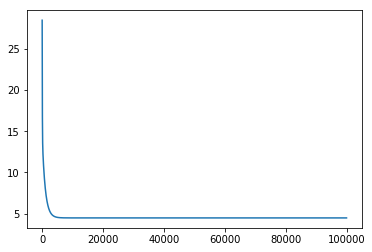

In [47]:
plt.plot(itera, costhistory)

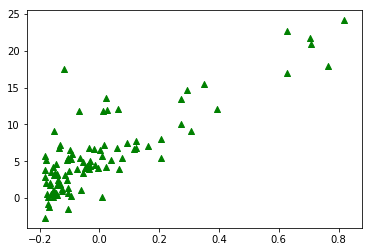

In [52]:
plt.scatter(x,y,color='green',marker='^')

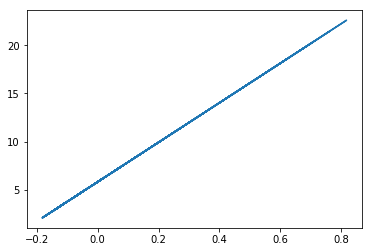

In [50]:
plt.plot(x,ypredicted)